In [78]:
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

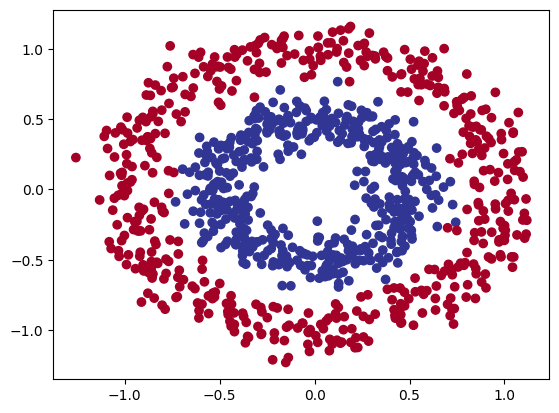

In [79]:
# 生成训练数据
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)

# 可视化数据
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

In [80]:
X = (X-X.mean(axis=0))/X.std(axis=0)

In [81]:
X.shape, X.mean(), X.std()

((1000, 2), np.float64(1.2434497875801754e-17), np.float64(1.0000000000000004))

In [82]:
import torch
X, y = torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32).unsqueeze(1)

In [83]:
from utils_2 import Linear, Sigmoid, Sequential, cross_entropy, accuracy
from torch.utils.data import TensorDataset, DataLoader

In [84]:
# 定义多层感知机
model = Sequential(
    Linear(2, 4),
    Sigmoid(),
    Linear(4, 8),
    Sigmoid(),
    Linear(8, 4),
    Sigmoid(),
    Linear(4, 2), # Softmax -> NLLLoss（交叉熵在二分类时退化为二元交叉熵）
)
for param in model.parameters():
    param.requires_grad = True

max_epochs = 1000
batch_size = 100
learning_rate = 0.1
print_interval = 100
dataset = TensorDataset(X, y)
dataloader = DataLoader(
    dataset=dataset,
    batch_size=batch_size,
    shuffle=True
)

for epoch in range(max_epochs):
    loss_avg = .0
    for batch_idx, (X_batch, y_batch) in enumerate(dataloader):
        y_pred = model(X_batch)
        loss = cross_entropy(y_pred, y_batch)
        loss = loss / len(X_batch)
        loss_avg += loss.item()
        model.zero_grad()
        loss.backward()
        for param in model.parameters():
            param.data -= learning_rate * param.grad
    if epoch % print_interval == 0:
        with torch.no_grad():
            loss_avg /= len(dataloader)
            acc = accuracy(model(X), y)
            print(f"Epoch {epoch}, Loss: {loss_avg*1e3:.2f}, Acc: {acc*1e2:.2f}%")



Epoch 0, Loss: -561.98, Acc: 0.00%
Epoch 100, Loss: -2905.05, Acc: 0.00%
Epoch 200, Loss: -3360.07, Acc: 0.00%
Epoch 300, Loss: -3596.33, Acc: 0.00%
Epoch 400, Loss: -3756.01, Acc: 0.00%
Epoch 500, Loss: -3876.83, Acc: 0.00%


KeyboardInterrupt: 